In [1]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
sys.path.append('../')

In [22]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from models.Noisy_models.Noisy_abstract_model import Noisy_abstract_model, Null_model
from utils.sequence_utils import *
import editdistance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
import RNA
RAA="UGCA"

In [4]:
target='GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCGGACCCCGUCCGCGCGGGGCCCCCGCGCGGACGGGGGCGAGCCGGAAUGUGCCUC'
wt="AGUC"*20

In [5]:
from models.Ground_truth_oracles.RNA_landscape_models import RNA_landscape_binding

In [6]:
len(wt)

80

In [7]:
wt=generate_random_sequences(100,1,alphabet=RAA)[0]

In [8]:
wt

'CGAAGUCCUGAUAAUGUAGAGUUACCAUGAAACCGUGCCACCUCUGUGAGGCGACUUGGGGAUUGGACAUAUGGGUCCAACUUGUCGGUUUCGAAUGUCC'

In [9]:
base_landscape=RNA_landscape_binding(target)
#base_landscape=Conserved_landscape(base_landscape, wt[:2],0)
base_landscape.get_fitness(wt)

0.2287581645665935

In [23]:
noisy_landscape= Noisy_abstract_model(base_landscape,signal_strength=0.5)
noisy_landscape = Null_model(base_landscape)
noisy_landscape.reset([wt])

In [24]:
noisy_landscape.get_fitness(wt)

0.2287581645665935

In [25]:
len("AUGUUUCUUUUAUUUAUCUGAGCAUGGGCGGGGCAUUUGCCCAUGCAAUU")

50

In [26]:
noisy_landscape.get_fitness("ACCGUGGUUCCAGGUGAAAACGAUAUGCUACCUGCUAAACGAGAAAGACGGGAACUUGAUAAGCGAGCAAAGCCAGUAUUUAGUUACAGCAGGAAUGUCC")

0.2057511230263905

In [27]:
noisy_landscape.cost

1

In [28]:
def walk_out(start,steps):
    seqs=[start]
    for i in range(steps):
        seqs.append(random.choice(generate_single_mutants(seqs[-1],alphabet=RAA)))

    return seqs

In [29]:
walk=walk_out(wt,15)

In [30]:
fitnesses=[base_landscape.get_fitness(x) for x in walk]

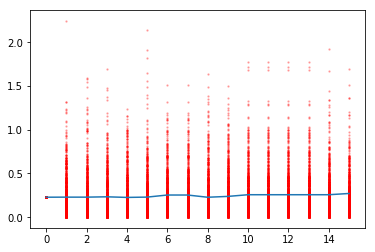

In [31]:
noisy_fitnesses=[]
indices=[]
ndf=pd.DataFrame()
for i in range(1000):
    noisy_landscape.reset([wt])
    plt.scatter(range(16), [noisy_landscape.get_fitness(x) for x in walk],c="r",alpha=0.25,s=2)
    noisy_fitnesses.extend([noisy_landscape.get_fitness(x) for x in walk])
    indices.extend([x for x in range(16)])
    
len(indices),len(noisy_fitnesses)
ndf["distance"]=indices
ndf["nfit"]=noisy_fitnesses
plt.plot(fitnesses)

#plt.ylim(0,1)

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


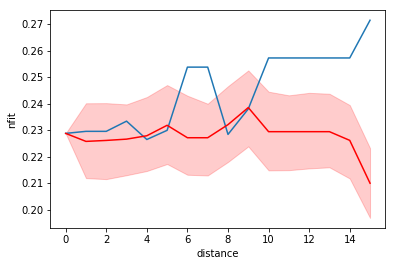

In [32]:
plt.plot(fitnesses)

sns.lineplot(x="distance",y="nfit",data=ndf,color="r")
#plt.ylim(0.4,0.8)

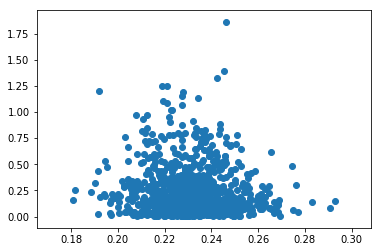

In [34]:
some_sequences= [generate_random_mutant(wt,0.05, RAA) for i in range(0,1000)]
plt.scatter([base_landscape.get_fitness(s) for s in some_sequences],\
           [noisy_landscape.get_fitness(s) for s in some_sequences])

In [169]:
from explorers.base_explorer import Base_explorer, Random_explorer

In [170]:
noisy_landscape.reset([wt])

In [171]:
bexp= Random_explorer(alphabet="UCGA",mu=0.03)
bexp.set_model(noisy_landscape)

In [172]:
#bexp.batches

In [173]:
bexp.run(5,overwrite=True)

round: 0, cost: 1, evals: 0, top: 0.19953864016913378
round: 1, cost: 101, evals: 100, top: 0.2429834651283586
round: 2, cost: 201, evals: 200, top: 0.2537485522923558
round: 3, cost: 301, evals: 300, top: 0.2787389400181181
round: 4, cost: 401, evals: 400, top: 0.2787389400181181


In [174]:
data=pd.read_csv("./simulations/Random_mu0.03.csv",index_col=False)

In [175]:
data.head()

,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
0,1,CACCCGACGGAGUACCUAGCCACGUUAUGCUACGCGAGACAACUGC...,0.195694,0.019133,100,101,100,-1,-1,NAMb_ss0.5,10,5,Random_mu0.03
1,1,CACCCGACGGCGUACCUAGCCACGUUAUGCUACGCGAGAGAACCGC...,0.206075,0.179196,100,101,100,-1,-1,NAMb_ss0.5,10,5,Random_mu0.03
2,1,CACCCGACGGCGUACCAAGCCACGUUAUGCUACGCGAGAGAACUGC...,0.198385,0.247522,100,101,100,-1,-1,NAMb_ss0.5,10,5,Random_mu0.03
3,1,CACCCGACGACGUACCUAGCCACGUUAUGCUACGCGAGGGAGCUGC...,0.210304,0.122578,100,101,100,-1,-1,NAMb_ss0.5,10,5,Random_mu0.03
4,1,CACCCGACGGCGUACCUAGCCACGUUAUGCUACGCGAGAGUACUGC...,0.199923,0.162954,100,101,100,-1,-1,NAMb_ss0.5,10,5,Random_mu0.03


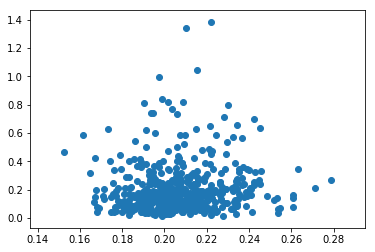

In [176]:


plt.scatter(data["true_score"],data["model_score"])

In [177]:
from scipy.stats import pearsonr
for i in data.batch.unique():
    sub_data=data[data.batch==i] #must also group by model type and landscape id
    print(len(sub_data))
    print (pearsonr(sub_data["true_score"],sub_data["model_score"]))

100
(0.17254595140005927, 0.08604004889357615)
100
(0.06571649058051163, 0.5159471060550018)
100
(0.00281143347861255, 0.977852836311174)
100
(0.17546570325549138, 0.08078123205498246)
100
(-0.034578652007894846, 0.732696124781056)


In [131]:
def get_top_sequence_per_batch(data):
    top_per_batch=[]
    for i in data.batch.unique():
        sub_data=data[data.batch==i] #must also group by model type and landscape id
        #print (sub_data.true_score.max())
        top_per_batch.append(sub_data.true_score.max())
    return (top_per_batch)
    

In [132]:
get_top_sequence_per_batch(data)

[0.24721261646632736,
 0.2587466415705253,
 0.25182621477498945,
 0.2775855257746813,
 0.274125341709456]

In [69]:
from explorers.evolutionary_explorers import WF

In [95]:
wt= "AUGUUUCUUUUAUUUAUCUGAGCAUGGGCGGGGCAUUUGCCCAUGCAAUU"

In [96]:
noisy_landscape.reset([wt])

In [97]:
bexp= WF(mu=0.01, recomb_rate=0.1,beta=100)
bexp.set_model(noisy_landscape)

In [98]:
bexp.run(15,overwrite=True,verbose=True)

round: 0, cost: 1, evals: 0, top: 0.31526335284807844
round: 1, cost: 35, evals: 34, top: 0.3590926541105393
round: 2, cost: 83, evals: 82, top: 0.44675122730291844
round: 3, cost: 118, evals: 117, top: 0.46828143096345554
round: 4, cost: 160, evals: 159, top: 0.4882737294110483
round: 5, cost: 207, evals: 206, top: 0.5036524295499789
round: 6, cost: 254, evals: 253, top: 0.5213379581757833
round: 7, cost: 313, evals: 312, top: 0.5643983068317722
round: 8, cost: 375, evals: 374, top: 0.605920808939902
round: 9, cost: 416, evals: 415, top: 0.6382160557656222
round: 10, cost: 455, evals: 454, top: 0.6559015843914265
round: 11, cost: 505, evals: 504, top: 0.6881968312171468
round: 12, cost: 557, evals: 556, top: 0.7251057350166146
round: 13, cost: 618, evals: 617, top: 0.7635524853639412
round: 14, cost: 677, evals: 676, top: 0.7920030571549287


In [74]:
data=pd.read_csv("./simulations/WF_mu0.01_r0.1_rho1_beta100.csv",index_col=False)

In [75]:
data.tail()

,batch,sequence,true_score,model_score,batch_size,landscape_cost,landscape_evals,landscape_id,start_id,model_type,...,0.9027297098882465,100,28,27,-1,-1,NAMb-0.1ss1maxunc4,0,15,WF_mu0.01_r0.1_rho1_beta100
756,15,CCGUCCGCGUGGGGGCCCCGCGCGGACGGGGGGGAGCCGGGAUGUG...,0.917339,0.917339,100,513,512,-1,-1,NAMb-0.1ss1maxunc4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,15,CCGUCCGCGCGGGGGCCCCGCGCGGACGGGGUCGAGCCGGAGUGUG...,0.948866,0.948866,100,513,512,-1,-1,NAMb-0.1ss1maxunc4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758,15,CCGUCCGUGCGGGGGCCCCGCGCGGACGGGGGCGAGCCGGAAUGUG...,0.888120,0.888120,100,513,512,-1,-1,NAMb-0.1ss1maxunc4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,15,CCGUCCGCGCGGGGGCCCCGCUCGGACGGGGGCGAGCCGGAAUGUG...,0.913495,0.913495,100,513,512,-1,-1,NAMb-0.1ss1maxunc4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,15,CCGUCCGCGCGAGGGCCCCGCGCGGACGGGGGCGAGCCGGGAUGUG...,0.901192,0.901192,100,513,512,-1,-1,NAMb-0.1ss1maxunc4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
get_top_sequence_per_batch(data)

[0.8858131045363716,
 0.9027297098882464,
 0.9027297098882464,
 0.9027297098882464,
 0.9580930069223628,
 0.9580930069223628,
 0.9580930069223628,
 0.9580930069223628,
 0.9580930069223628,
 0.9580930069223628,
 0.9580930069223628,
 0.9580930069223628,
 0.9580930069223628,
 0.9580930069223628,
 0.9580930069223628]

In [77]:
from scipy.stats import pearsonr
for i in data.batch.unique():
    sub_data=data[data.batch==i] #must also group by model type and landscape id
    print(len(sub_data))
    print (pearsonr(sub_data["true_score"],sub_data["model_score"]))

27
(1.0, 0.0)
47
(1.0, 0.0)
47
(1.0, 0.0)
58
(1.0, 0.0)
49
(1.0, 0.0)
27
(1.0, 0.0)
46
(1.0, 0.0)
52
(1.0, 0.0)
63
(1.0, 0.0)
64
(1.0, 0.0)
53
(1.0, 0.0)
52
(1.0, 0.0)
49
(1.0, 0.0)
61
(1.0, 0.0)
66
(1.0, 0.0)


In [78]:
from explorers.elitist_explorers import XE_IS, Greedy

In [79]:
noisy_landscape.reset([wt])

In [80]:
bexp= XE_IS(beta=100, recomb_rate=0.1, threshold=0.05)
bexp.set_model(noisy_landscape)

In [81]:
bexp.run(10,overwrite=True,verbose=True)

round: 0, cost: 1, evals: 0, top: 0.9027297098882465
round: 1, cost: 101, evals: 1000, top: 0.9027297098882465
round: 2, cost: 201, evals: 2000, top: 0.9027297098882465
round: 3, cost: 301, evals: 3000, top: 0.9027297098882465
round: 4, cost: 401, evals: 4000, top: 0.9027297098882465
round: 5, cost: 501, evals: 5000, top: 0.9027297098882465
round: 6, cost: 601, evals: 6000, top: 0.9027297098882465
round: 7, cost: 701, evals: 7000, top: 0.9027297098882465
round: 8, cost: 801, evals: 8000, top: 0.9027297098882465
round: 9, cost: 901, evals: 9000, top: 0.9027297098882465


In [99]:
noisy_landscape.reset([wt])
bexp= Greedy(recomb_rate=0.1, threshold=0.05, mu=0.02, virtual_screen=100)
bexp.set_model(noisy_landscape)

In [100]:
bexp.run(11,overwrite=True,verbose=True)

round: 0, cost: 1, evals: 0, top: 0.31526335284807844
round: 1, cost: 101, evals: 1005, top: 0.4144559804771982
round: 2, cost: 201, evals: 2008, top: 0.47597078103292084
round: 3, cost: 301, evals: 3073, top: 0.5567089567623068
round: 4, cost: 401, evals: 4089, top: 0.6305267056961569
round: 5, cost: 501, evals: 5204, top: 0.6905036597040206
round: 6, cost: 601, evals: 6443, top: 0.7481737852250105
round: 7, cost: 701, evals: 7667, top: 0.8004613304983236
round: 8, cost: 801, evals: 8841, top: 0.8389080808456502
round: 9, cost: 901, evals: 10135, top: 0.857362532745384
round: 10, cost: 1001, evals: 11487, top: 0.8881199330232453


In [189]:
from utils.model_architectues import Linear, NLNN, CNNa

In [190]:
cnn_model=NLNN(len(wt), alphabet="UCGA")

In [191]:
cnn_model.seq_len

40

In [192]:
from models.Noisy_models.Neural_network_models import NN_model

In [193]:
nnModel=NN_model(base_landscape,cnn_model)

In [194]:
nnModel.reset()

In [195]:
some_sequences= [generate_random_mutant(wt,0.05, RAA) for i in range(0,1000)]
some_other_sequences= [generate_random_mutant(wt,0.02, RAA) for i in range(0,1000)]


In [196]:
nnModel.measure_true_landscape(some_sequences)

In [197]:
nnModel.update_model(some_sequences)

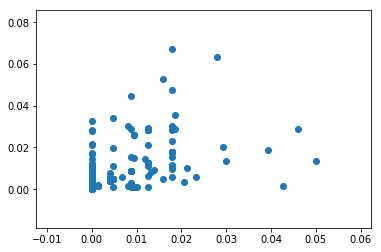

In [198]:
plt.scatter([base_landscape.get_fitness(s) for s in some_other_sequences],\
           [nnModel.get_fitness(s) for s in some_other_sequences])

In [199]:
pearsonr([base_landscape.get_fitness(s) for s in some_other_sequences],\
           [nnModel.get_fitness(s) for s in some_other_sequences])

(0.7006373234900671, 1.7955345136714752e-148)

In [247]:
from models.Ground_truth_oracles.RNA_landscape_models import *

In [184]:
rna_l_constrctr.import_landscapes("data/RNA_landscapes/RNA_landscape_config.yaml")

B1L14RNA1 imported
B1L50RNA1 imported
B1L100RNA1 imported
B1L14RNA2 imported
B1L50RNA2 imported
B1L100RNA2 imported
B2L14RNA1+2 imported
B2L50RNA1+2 imported
B2L100RNA1+2 imported
C20B2L100RNA1+2 imported
B2L100RNA3+4 imported
C20B2L100RNA3+4 imported


In [248]:
new_landscape = rna_l_constrctr.construct(rna_l_constrctr.imported_landscapes[0])

In [179]:
new_landscape.get_fitness('AUGGGCCGGACCCC')

0.5437468768175177

In [257]:
rna_l_constrctr = RNA_landscape_constructor() 
rna_l_constrctr.load_landscapes("data/RNA_landscapes/RNA_landscape_config.yaml")
#new_landscape ,starts,lid=  rna_l_constrctr.construct(rna_l_constrctr.loaded_landscapes[-1])

B1L14RNA1 loaded
B1L50RNA1 loaded
B1L100RNA1 loaded
B1L14RNA2 loaded
B1L50RNA2 loaded
B1L100RNA2 loaded
B1L14RNA3 loaded
B1L50RNA3 loaded
B1L100RNA3 loaded
B1L14RNA4 loaded
B1L50RNA4 loaded
B1L100RNA4 loaded
B2L14RNA1+2 loaded
B2L14RNA1+3 loaded
B2L14RNA1+4 loaded
B2L14RNA2+3 loaded
B2L14RNA2+4 loaded
B2L14RNA3+4 loaded
B2L50RNA1+2 loaded
B2L50RNA1+3 loaded
B2L50RNA1+4 loaded
B2L50RNA2+3 loaded
B2L50RNA2+4 loaded
B2L50RNA3+4 loaded
B2L100RNA1+2 loaded
B2L100RNA1+3 loaded
B2L100RNA1+4 loaded
B2L100RNA2+3 loaded
B2L100RNA2+4 loaded
B2L100RNA3+4 loaded
C20B2L100RNA1+2 loaded
C20B2L100RNA1+3 loaded
C20B2L100RNA1+4 loaded
C20B2L100RNA2+3 loaded
C20B2L100RNA2+4 loaded
C20B2L100RNA3+4 loaded


In [242]:
for landscape in rna_l_constrctr.imported_landscapes:
    #print (landscape)
    new_landscape,starts,lid=  rna_l_constrctr.construct(landscape)
    print (lid)
    for start in starts: 
        print (new_landscape.get_fitness(starts[start]), start)

B1L14RNA1
0.5437468768175177 0
0.6508485804029885 1
0.28011203300685433 2
0.14554841726711917 3
0.4311528379427804 4
B1L50RNA1
0.6443675592872286 0
0.9027297098882465 1
0.31526335284807844 2
0.28911955087887925 3
0.18685120082149892 4
B1L100RNA1
0.6220684323527621 0
0.3121876010872752 1
0.25182621477498945 2
0.24913495398369367 3
0.22106881449712817 4
B1L14RNA2
0.8244807930861012 0
0.631573402512535 1
0.2774694908881936 2
0.16648169957321193 3
0.43866606234192623 4
B1L50RNA2
0.6074731940942895 0
0.9877913875619694 1
0.2574916818991125 2
0.27968924117016797 3
0.16722161599785032 4
B1L100RNA2
0.8201998037752379 0
0.31113578347082993 1
0.248242698869506 2
0.22641510738733164 3
0.2134665311458826 4
B1L14RNA3
0.5466472148454223 0
0.48701296690685003 1
0.31804930127547987 2
0.1623376609015097 3
0.34455338338563807 4
B1L50RNA3
0.3849721597881095 0
0.4573283658757433 1
0.23562151112681343 2
0.3005565919170035 3
0.18923932320053516 4
B1L100RNA3
0.30983302950225916 0
0.27782931275576694 1
0.2597

In [282]:
from models.Ground_truth_oracles.TF_binding_landscape_models import *

In [283]:
TFc=TF_binding_landscape_constructor()

In [284]:
TFc.load_landscapes()

In [285]:
TFgen= TFc.generate_from_loaded_landscapes()

In [287]:
for landscape in TFgen:
    print (landscape["landscape_id"])
    for seq in landscape["starting_seqs"]:
        print (landscape["landscape_obj"].get_fitness(landscape["starting_seqs"][seq]))

PAX6_R242T_R1
0.39713000000000004
0.07251
0.20079
0.21431
0.14457
0.25054
0.34673000000000004
-0.23044
-0.28392
-0.22207
-0.27355
-0.28648
-0.039689999999999996
-0.38968
-0.27237
PAX4_R192H_R2
0.49817
0.02036
-0.29857
0.004229999999999999
0.17445
0.12414000000000001
0.39914
0.0024
0.10862000000000001
-0.05446
-0.10945
-0.11177999999999999
0.02421
-0.0113
-0.09755
OXC1_P79L_R1
0.08273
0.00584
-0.28863
-0.09292
-0.00924
0.12312000000000001
-0.02481
0.11703
0.12308
0.2215
-0.09883
0.09872
0.15337
0.036610000000000004
-0.02696
HOXD13_REF_R1
0.47823000000000004
0.08007
0.07977999999999999
0.09233999999999999
0.27912
0.19722
0.35025
0.13898
0.28676
0.02806
0.12522
0.16759000000000002
0.0886
-0.06448999999999999
-0.10064
HOXD13_Q325R_R1
0.45924
0.16847
0.0743
0.06795
0.17809
0.28081
0.34742
0.17089000000000001
0.3016
0.17697000000000002
0.11865
0.25181
0.08255
-0.03954
-0.08625
OXC1_S131L_R1
0.22625
-0.0016699999999999998
0.07712000000000001
0.01063
0.19468
0.12075999999999999
0.14047
0.0505


NR1H4_REF_R1
0.08151
-0.3236
0.09876
-0.09283999999999999
0.08922000000000001
0.0851
-0.01459
0.041530000000000004
-0.0697
-0.22139
-0.24229
-0.06271
-0.1629
0.14164000000000002
-0.12678
SIX6_REF_R2
0.14297
0.0029100000000000003
-0.25841
-0.15907000000000002
0.31755
0.10959
-0.01268
-0.08793
-0.1057
-0.06622
-0.37496999999999997
-0.16514
0.2028
-0.14645999999999998
-0.13643
ARX_L343Q_R2
0.43701
0.022369999999999998
-0.21168
0.0463
0.28978000000000004
0.30896
0.3645
0.0214
-0.08211
-0.18268
-0.09233
-0.16449
-0.08651
-0.14442
-0.18387
HESX1_R160C_R1
0.30180999999999997
0.051370000000000006
0.22985
0.00686
0.21525999999999998
0.25314000000000003
0.3741
-0.01521
0.06838
-0.06826
0.11116
0.24364
0.16905
0.03636
-0.013630000000000001
PAX4_REF_R1
0.49167
0.18979000000000001
-0.14985
0.08602
0.053579999999999996
-0.00435
0.3871
-0.06915
0.20475
-0.11989000000000001
-0.1575
-0.15155
-0.17798
-0.02193
-0.21198000000000003
VSX1_REF_R1
0.49727
0.01741
-0.11905999999999999
0.12322000000000001
0.11

WT1_H373Y_R1
0.37651999999999997
-0.08666
-0.27352
-0.2692
0.25037
0.31011
0.40001
0.10074
0.20731999999999998
0.06802000000000001
0.12342
0.21628000000000003
0.17587
0.07192
-0.08619
ARX_P353R_R2
0.42158999999999996
0.0005200000000000001
-0.16519
-0.15043
0.32650999999999997
0.32727
0.38101999999999997
-0.0276
-0.04382
-0.1246
-0.0633
-0.14119
0.00232
-0.19288
-0.21274
PBX4_REF_R1
0.18655
-0.04824
0.16616
-0.08528999999999999
0.12514
0.17945999999999998
0.29468
0.0889
0.1034
-0.061360000000000005
-0.015969999999999998
0.13180999999999998
0.06217
-0.07368999999999999
-0.10783
KLF1_REF_R1
0.28352
-0.02101
0.01111
0.03536
0.26759
0.17723
0.25956
-0.04024
-0.06956
-0.00966
-0.18939
-0.02411
0.0872
0.06567
-0.11673
EGR2_D383Y_R1
0.09385
0.07009
0.3909
0.41446000000000005
0.11573
0.13097
0.07446
-0.24265
-0.27284
-0.12240999999999999
-0.18441
-0.14417
0.04451
-0.10749
-0.040619999999999996
KLF11_R402Q_R1
0.00539
-0.05619
-0.07952999999999999
-0.01113
0.32934
0.36196
0.36464
-0.26444
-0.2919

MSX2_P148H_R1
0.49196000000000006
0.04999
-0.15827
0.13978
0.11835
0.05586
0.40931
0.01741
0.29368
-0.18622
-0.06526
-0.05189
-0.15256
-0.02563
-0.12847
ZNF655_E327G_R1
0.1008
-0.09162000000000001
0.09739
-0.00857
0.29563
0.32714
0.2456
-0.03584
0.019719999999999998
-0.13976
-0.1876
0.13105
0.1083
0.061689999999999995
-0.23981
PAX7_P112L_R1
0.32978
0.0335
0.09502000000000001
-0.059379999999999995
0.19067
0.25929
0.17484
0.08256000000000001
0.17422
0.02721
0.11166
0.17174
0.11105
0.04274
-0.11416
PAX3_REF_R1
0.48115
-0.052110000000000004
-0.38918
-0.07654
0.18024
0.21934
0.41968
-0.23108
0.04602
-0.24996
-0.2124
-0.30318
-0.13276
-0.25536
-0.2128
GFI1_L400F_R1
0.34271
-0.06425
0.00897
-0.1579
0.18684
0.10463
0.27474
0.07765
0.13448
0.030610000000000002
-0.046689999999999995
0.03528
0.25553000000000003
-0.063
-0.014819999999999998
ESX1_K193R_R1
0.49821000000000004
-0.0042899999999999995
0.0092
0.11731
0.10991
0.2124
0.42901999999999996
0.01057
0.0034700000000000004
-0.25248000000000004
-

POU4F3_REF_R1
0.49056000000000005
-0.03559
-0.10876
0.12019
0.13558
0.14548
0.37271
0.013630000000000001
0.24865
-0.10259000000000001
-0.046560000000000004
0.06791
-0.09548999999999999
0.02185
-0.16112
SNAI2_REF_R1
0.36358
-0.1086
0.00317
0.00938
0.23765
0.27876999999999996
0.36998000000000003
0.07311000000000001
0.22411999999999999
-0.04589
0.12193
0.27371
0.10987000000000001
0.02541
-0.14087
SIX6_T165A_R2
0.16535
0.08457999999999999
-0.27633
-0.1633
0.30316
0.04991
-0.06326
-0.04198
-0.13910999999999998
-0.08482999999999999
-0.37213
-0.16279000000000002
0.16096
-0.11835
-0.1733
HOXB7_K191R_R1
0.42541999999999996
-0.07662999999999999
0.00018999999999999998
-0.009059999999999999
0.31348000000000004
0.28467
0.44528
-0.0019199999999999998
0.055260000000000004
-0.24723
-0.10549000000000001
-0.01826
0.007090000000000001
0.03762
-0.20611999999999997
HOXC4_N178S_R1
0.49736
-0.10405
-0.22621
0.12075999999999999
0.1412
0.17854
0.41268
-0.030180000000000002
0.14775
-0.1043
-0.0786
0.01145
-0.08

In [539]:
#data=pd.read_csv("./simulations/eval/CRI/Greedy_mu0.02_tr0.05_r0.1_rho1.csv",index_col=False)
data=pd.read_csv("./simulations/eval/EF/Greedy_mu0.02_tr0.05_r0.1_rho1.csv",index_col=False)


In [540]:
data.head()

,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,mo_ratio,horizon,explorer_type
0,1,GAACGAGGCACAUUCCGGCUCGCCUGGCCUAUGUGAGCAUGGGCCG...,0.649750,0.649750,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
1,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.649750,0.649750,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
2,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.649750,0.649750,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
3,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.638601,0.638601,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
4,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.632449,0.632449,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1


In [541]:
data.columns

Index(['batch', 'sequence', 'true_score', 'model_score', 'batch_size',
       'measurement_cost', 'virtual_evals', 'landscape_id', 'start_id',
       'model_type', 'mo_ratio', 'horizon', 'explorer_type'],
      dtype='object')

In [543]:
data.groupby( 'mo_ratio').max()

,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,horizon,explorer_type
mo_ratio,,,,,,,,,,,,
1,10,UUUCGUGGCACAUUCCGGCUCGCACGGGUCUUGUGAGCACGGGCCG...,0.65321,0.65321,1000,10001,19530,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,10,Greedy_mu0.02_tr0.05_r0.1_rho1
10,8,UUUCGAGGCACAUUCCGGCUCUCGCUGCCCAGCAGAGCAUGGGCCG...,0.65321,0.65321,1000,8001,124847,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,10,Greedy_mu0.02_tr0.05_r0.1_rho1


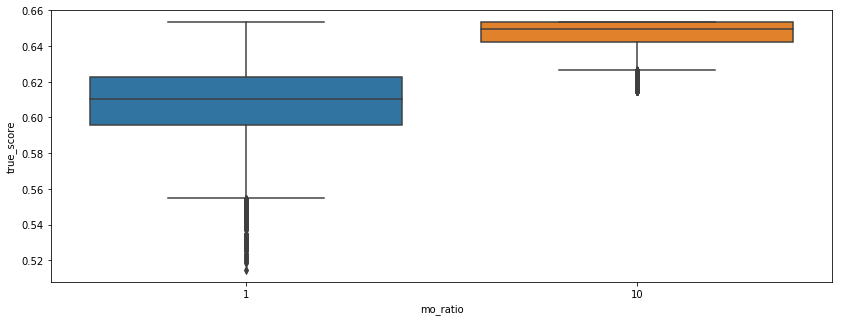

In [545]:
plt.figure(figsize=(14,5))
sns.boxplot(x='mo_ratio',y="true_score",data=data)

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


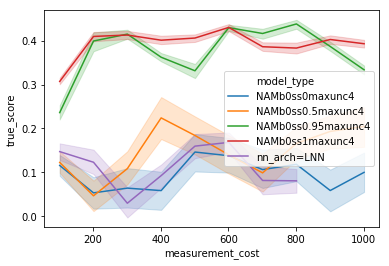

In [510]:
sns.lineplot(x="measurement_cost",y="true_score",hue="model_type",data=data)

In [335]:
sns.lineplot(x="measurement_cost",y="true_score",hue="model_type",
             data=data.groupby(["measurement_cost","landscape_id","model_type"]).max())

ValueError: Could not interpret input 'measurement_cost'

In [334]:
data.groupby(["measurement_cost","landscape_id","model_type"]).max()

batch  \
measurement_cost landscape_id model_type                      
101              -1           nn_arch=CNNa_hd100_f50      1   
                              nn_arch=LNN                 1   
                              nn_arch=NLNN_hd50           1   
                 B1L100RNA1   NAMb0ss0.5maxunc4           1   
                              NAMb0ss0.9maxunc4           1   
                              NAMb0ss0maxunc4             1   
                              NAMb0ss1maxunc4             1   
                 B1L14RNA1    NAMb0ss0.5maxunc4           1   
                              NAMb0ss0.9maxunc4           1   
                              NAMb0ss0maxunc4             1   
                              NAMb0ss1maxunc4             1   
                 B1L50RNA1    NAMb0ss0.5maxunc4           1   
                              NAMb0ss0.9maxunc4           1   
                              NAMb0ss0maxunc4             1   
                              NAMb0ss1maxunc4             1   
201              -1           nn_arch=CNNa_hd100_f50      2   
                              nn_arch=LNN                 2   
                              nn_arch=NLNN_hd50           2   
                 B1L100RNA1   NAMb0ss0.5maxunc4           2   
                              NAMb0ss0.9maxunc4           2   
                              NAMb0ss0maxunc4             2   
                              NAMb0ss1maxunc4             2   
                 B1L14RNA1    NAMb0ss0.5maxunc4           2   
                              NAMb0ss0.9maxunc4           2   
                              NAMb0ss0maxunc4             2   
                              NAMb0ss1maxunc4             2   
                 B1L50RNA1    NAMb0ss0.5maxunc4           2   
                              NAMb0ss0.9maxunc4           2   
                              NAMb0ss0maxunc4             2   
                              NAMb0ss1maxunc4             2   
...                                                     ...   
901              -1           nn_arch=CNNa_hd100_f50      9   
                              nn_arch=LNN                 9   
                              nn_arch=NLNN_hd50           9   
                 B1L100RNA1   NAMb0ss0.5maxunc4           9   
                              NAMb0ss0.9maxunc4           9   
                              NAMb0ss0maxunc4             9   
                              NAMb0ss1maxunc4             9   
                 B1L14RNA1    NAMb0ss0.5maxunc4           9   
                              NAMb0ss0.9maxunc4           9   
                              NAMb0ss0maxunc4             9   
                              NAMb0ss1maxunc4             9   
                 B1L50RNA1    NAMb0ss0.5maxunc4           9   
                              NAMb0ss0.9maxunc4           9   
                              NAMb0ss0maxunc4             9   
                              NAMb0ss1maxunc4             9   
1001             -1           nn_arch=CNNa_hd100_f50     10   
                              nn_arch=LNN                10   
                              nn_arch=NLNN_hd50          10   
                 B1L100RNA1   NAMb0ss0.5maxunc4          10   
                              NAMb0ss0.9maxunc4          10   
                              NAMb0ss0maxunc4            10   
                              NAMb0ss1maxunc4            10   
                 B1L14RNA1    NAMb0ss0.5maxunc4          10   
                              NAMb0ss0.9maxunc4          10   
                              NAMb0ss0maxunc4            10   
                              NAMb0ss1maxunc4            10   
                 B1L50RNA1    NAMb0ss0.5maxunc4          10   
                              NAMb0ss0.9maxunc4          10   
                              NAMb0ss0maxunc4            10   
                              NAMb0ss1maxunc4            10   

                                                                                    

In [511]:
import timeit